![title](images/logo_25.png)

# Detectando Fraudes Bancárias

## Introdução<br>
Em 2016 o número de transações bancárias no Brasil atingiu a marca de 65 bilhões, um aumento de 17% em relação ao ano anterior [this][1], sendo que as operações através de *internet banking* e *mobile banking* representaram 57% do total de transações bancárias realizadas no período. Neste mesmo ano, as fraudes realizadas através de boletos bancários somaram um total de 383 milhões de reais [this][2].<br>
   
Em 2017, os bancos e instituições financeiras, desembolsaram só com despesas em segurança de tecnologia da informação um total de 2 bilhões de reais [this][3]. Nos últimos 2 anos, o número de transações bancárias realizadas através de meios digitais e o investimento em segurança aumentaram e, em contrapartida, o número de fraudes bancárias com boletos (por exemplo), vem crescendo e gerando um prejuízo considerável aos bancos e seus clientes.<br>
    
Tal prejuízo pode ser mitigado, como já é feito em transações bancárias de determinados bancos, com o uso das tecnologias em Machine Learning e Pattern Recognition, sendo possível classificar, identificar e bloquear as fraudes bancárias que estão acontecendo.<br>

## Qual é o objetivo desse estudo?<br>
Dado a importacia da identificação da autenticidade de uma transação bancária para várias instituições financeiras, propomos aqui investigar o problema de “detecção de fraudes bancárias”.<br>
    
Como não encontramos nenhuma base nacional (brasileira), utilizamos a base de dados "*Credit Card Fraud Detection. Anonymized credit card transactions labeled as fraudulent or genuine*" disponível no Kagle através do link <https://www.kaggle.com/dalpozz/creditcardfraud/data><br>

##### MELHORAR ESTA PARTE 
Abordamos os conceitos de Redes Neurais e Deep Learning para processamento dos dados, qualitativamente, esperamos resultados em números que eventualmente podem ser plotados em gráficos para um análise macro de forma visual. Utilizaremos métricas de Erros e Teste como: modelo de treino, modelo de teste, matriz de confusão, acurácia, precisão e recall.

[1]: Pesquisa FEBRABAN de Tecnologia Bancária 2017, <https://cmsportal.febraban.org.br/Arquivos/documentos/PDF/Pesquisa%20FEBRABAN%20de%20Tecnologia%20Banc%C3%A1ria%202017.pdf><br>
[2]: Fraudes com boletos somam R$ 383 milhões em 2016, segundo Febraban, <http://www.valor.com.br/financas/4864120/fraudes-com-boletos-somam-r-383-milhoes-em-2016-segundo-febraban> <br>
[3]: Combate sem trégua às fraudes eletrônicas, <https://portal.febraban.org.br/noticia/3127/pt-br/><br>

## Índice:<br>
1.  **Legenda dos Campos da Base de Dados**
*   **Checando a quantidade de registros**
*  **Limpando os dados**
*  **Realizando as análises**
*  **Visualizando as análises**
*  ***Add mais coisas.... ((((((((((((((((((((((((((((((((( ***
*  **Conclusão**

### 1. Legenda dos Campos da Base de Dados:

1. Metadados das Colunas:
    * V1 à V 28 - Componentes Principais<br>
    * Amount - *Quantidade de Transações*<br>
    * Class - As classes de classificação reais<br>

In [1]:
%matplotlib inline
import pandas as pd # Para criarmos DataFrames
import numpy as np # Realizar alguns calculos matemáticos
import matplotlib.pyplot as plt # Para criação de gráficos
import seaborn as sns # Design de gráficos mais atraentes
import re # Para utilizar Regex
from collections import Counter

### Importando a base de dados

In [5]:
creditcard = pd.read_csv('creditcard.csv', encoding='ISO-8859-1')

In [42]:
creditcard.shape

(284807, 31)

### visualizando as primeiras linhas

In [6]:
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Checando a quantidade de registros

In [44]:
creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


No total temos 284807 linhas com 31 colunas cada.<br>
Agora quantas delas será que não são nulas?<br>
Vamos realizar essa contagem para cada variável.

In [43]:
creditcard.isnull().values.any()

False

Como não existem valores nulos, vamos ver a comparação de tempo de transações fraudulentas e autênticas.

In [65]:
print('Transações Autênticas:\n', creditcard[creditcard.Class == 0].shape)
print('Transações Fraudulentas:\n', creditcard[creditcard.Class == 1].shape)

normal_trans = creditcard.Time[creditcard.Class == 0]
fraud_trans = creditcard.Time[creditcard.Class == 1]

print('\nTransações Autênticas:\n', normal_trans.describe())
print('\nTransações Fraudulentas:\n', fraud_trans.describe())

Transações Autênticas:
 (284315, 31)
Transações Fraudulentas:
 (492, 31)

Transações Autênticas:
 count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64

Transações Fraudulentas:
 count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64


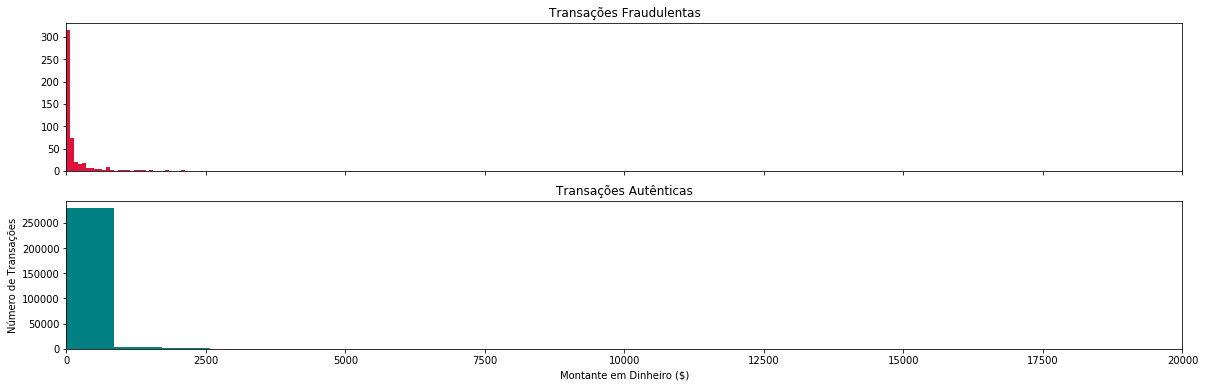

In [158]:
w, (fst, scd) = plt.subplots(2, 1, sharex=True, figsize=(20,6))

fst.set_title('Transações Fraudulentas')
cd_amount_1 = creditcard.Amount[creditcard.Class == 1]
fst.hist(cd_amount_1, bins = 30, color='crimson')

scd.set_title('Transações Autênticas')
cd_amount_0 = creditcard.Amount[creditcard.Class == 0]
scd.hist(cd_amount_0, bins = 30, color='teal')

plt.xlabel('Montante em Dinheiro ($)')
plt.ylabel('Número de Transações')
plt.xlim((0, 20000))
plt.show()

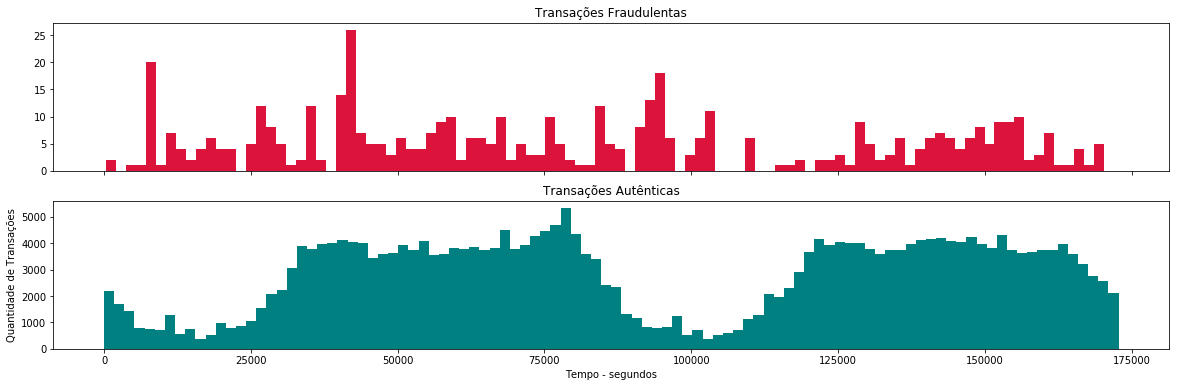

In [146]:
w, (fst, scd) = plt.subplots(2, 1, sharex=True, figsize=(20,6))

fst.set_title('Transações Fraudulentas')
cd_time_1 = creditcard.Time[creditcard.Class == 1]
fst.hist(cd_time_1, bins = 100, color='crimson')

scd.set_title('Transações Autênticas')
cd_time_0 = creditcard.Time[creditcard.Class == 0]
scd.hist(cd_time_0, bins = 100, color='teal')

plt.xlabel('Tempo - segundos')
plt.ylabel('Quantidade de Transações')
plt.show()

In [73]:
print('Time:\n',format(creditcard['Time'].describe()))
print('\nAmount:\n',format(creditcard['Amount'].describe()))
print('\nClass:\n',format(creditcard['Class'].describe()))

Time:
 count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

Amount:
 count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Class:
 count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64


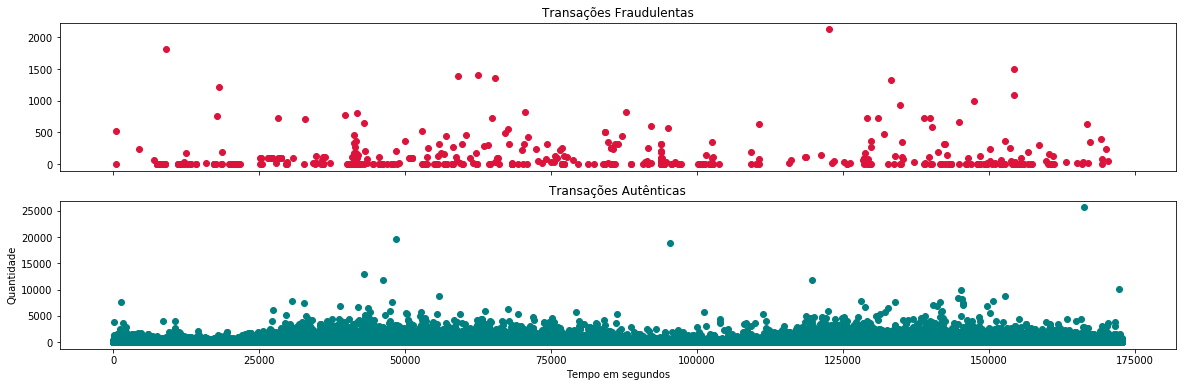

In [148]:
w, (fst, scd) = plt.subplots(2, 1, sharex=True, figsize=(20,6))

fst.set_title('Transações Fraudulentas')
cd_time_1 = creditcard.Time[creditcard.Class == 1]
cd_amount_1 = creditcard.Amount[creditcard.Class == 1]
fst.scatter(cd_time_1, cd_amount_1, color='crimson')

scd.set_title('Transações Autênticas')
cd_time_0 = creditcard.Time[creditcard.Class == 0]
cd_amount_0 = creditcard.Amount[creditcard.Class == 0]
scd.scatter(cd_time_0, cd_amount_0, color='teal')

plt.xlabel('Tempo em segundos')
plt.ylabel('Quantidade')
plt.show()